# 1_causal_analysis
Notebook for causal inference experiments — placeholder

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set paths (works inside Jupyter)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DATA_PATH = os.path.join(BASE_DIR, "data", "processed", "synthetic_transactions.csv")

# Load data
df = pd.read_csv(DATA_PATH, parse_dates=["date"])
df.head()



,transaction_id,city_tier,category,base_price,discount_percent,final_price,purchased,margin_after_discount,date
0,1,Tier-3,Beauty,2276.341399,10,2048.707259,0,227.634140,2024-03-12
1,2,Tier-3,Groceries,443.428731,15,376.914422,1,22.171437,2024-01-16
2,3,Tier-1,Electronics,1614.994807,0,1614.994807,0,322.998961,2024-04-11
3,4,Tier-3,Groceries,1374.655499,15,1168.457174,1,68.732775,2024-05-22
4,5,Tier-3,Beauty,2324.660628,10,2092.194565,0,232.466063,2024-08-04


In [4]:
print(df.info())
print("\nSummary statistics:\n", df.describe())

# Check missing values
print("\nMissing values:\n", df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transaction_id         50000 non-null  int64         
 1   city_tier              50000 non-null  object        
 2   category               50000 non-null  object        
 3   base_price             50000 non-null  float64       
 4   discount_percent       50000 non-null  int64         
 5   final_price            50000 non-null  float64       
 6   purchased              50000 non-null  int64         
 7   margin_after_discount  50000 non-null  float64       
 8   date                   50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 3.4+ MB
None

Summary statistics:
        transaction_id    base_price  discount_percent   final_price  \
count    50000.000000  50000.000000      50000.000000  50000.000

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load synthetic transaction data
df = pd.read_csv(r"C:\Users\ksush\Downloads\Summer_intern\Meesho_DynamicPricing\data\processed\synthetic_transactions.csv",
                 parse_dates=["date"])

# 2️⃣ Optional: create dummy variables if needed for categorical analysis
df = pd.get_dummies(df, columns=["category","city_tier"], drop_first=False)

# 3️⃣ Now df is ready for plotting
df.head()


,transaction_id,base_price,discount_percent,final_price,purchased,margin_after_discount,date,category_Beauty,category_Electronics,category_Fashion,category_Groceries,category_Home,city_tier_Tier-1,city_tier_Tier-2,city_tier_Tier-3
0,1,2276.341399,10,2048.707259,0,227.634140,2024-03-12,True,False,False,False,False,False,False,True
1,2,443.428731,15,376.914422,1,22.171437,2024-01-16,False,False,False,True,False,False,False,True
2,3,1614.994807,0,1614.994807,0,322.998961,2024-04-11,False,True,False,False,False,True,False,False
3,4,1374.655499,15,1168.457174,1,68.732775,2024-05-22,False,False,False,True,False,False,False,True
4,5,2324.660628,10,2092.194565,0,232.466063,2024-08-04,True,False,False,False,False,False,False,True


C:\Users\ksush\AppData\Local\Temp\ipykernel_27420\4115062431.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="discount_percent", y="purchased", data=df, estimator=np.mean, ci=None)


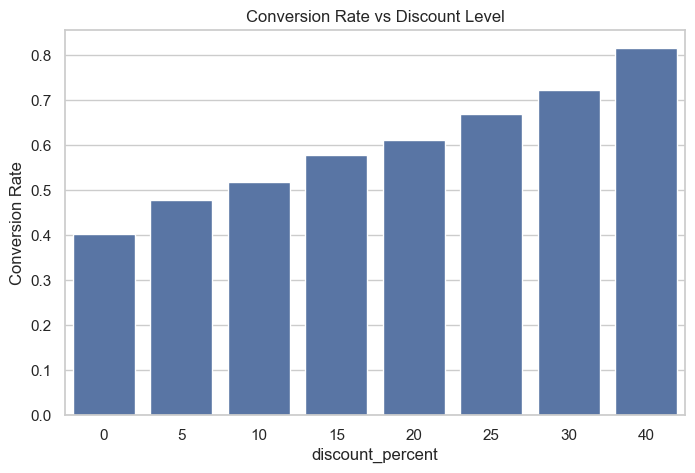

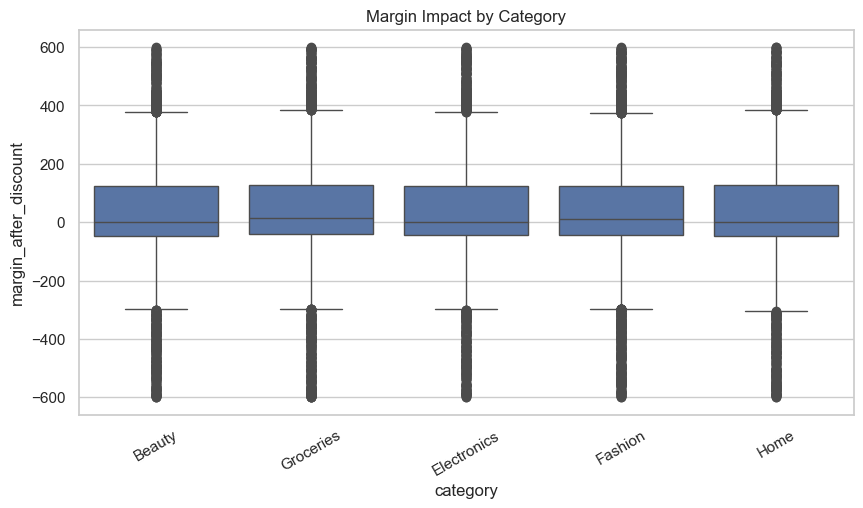

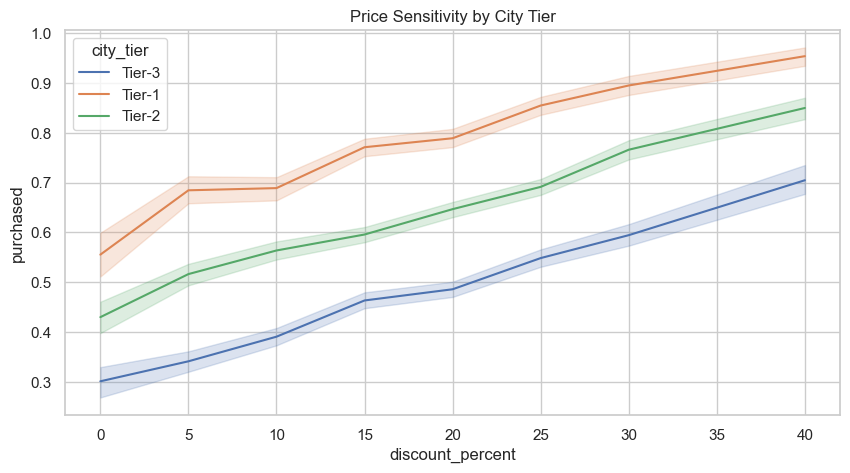

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv(r"C:\Users\ksush\Downloads\Summer_intern\Meesho_DynamicPricing\data\processed\synthetic_transactions.csv",
                 parse_dates=["date"])

sns.set(style="whitegrid")

# Conversion Rate vs Discount Level
plt.figure(figsize=(8,5))
sns.barplot(x="discount_percent", y="purchased", data=df, estimator=np.mean, ci=None)
plt.title("Conversion Rate vs Discount Level")
plt.ylabel("Conversion Rate")
plt.show()

# Margin Impact by Category
plt.figure(figsize=(10,5))
sns.boxplot(x="category", y="margin_after_discount", data=df)  # now it works
plt.title("Margin Impact by Category")
plt.xticks(rotation=30)
plt.show()

# Price Sensitivity by City Tier
plt.figure(figsize=(10,5))
sns.lineplot(x="discount_percent", y="purchased", data=df, hue="city_tier", estimator=np.mean)
plt.title("Price Sensitivity by City Tier")
plt.show()
